In [1]:
import numpy as np
import scipy
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import time
import multiprocessing
import os
from copy import deepcopy
import numpy.ma as ma

In [2]:
%run ../methodsMemoryDeposition

In [3]:
%run ../main.py

Stopped at time: 100.00110723787988| N_Ptcls: 36357| N_snapshots: 101


In [7]:
params = {
    "height":               400,
    "dom":                10000,
    "ndim":                   1,
    "t_max":              10000,
    "r_0":                    1,
    "tau":                  0.5,
    "dt_snapshot":            1,       
    "n_ptcl_snapshot":    np.inf,
    "foldername":  "SimResults",
    "filename":        "result",
}

In [ ]:
mean_exit_times = []
std_exit_times = []
taus = []

for i in np.arange(-1, 0, 0.01):
    tau = (10**i)
    params["tau"] = tau
    taus.append(tau)

    local_exit_time = []
    num_cores = multiprocessing.cpu_count()  # Get the number of available CPU cores

    with multiprocessing.Pool(processes=num_cores) as pool:
        results = pool.map(main, [params for _ in range(num_cores)])

    for res in results:
        _ , times = res
        if len(times) > 1:
            local_exit_time.append(times[-1])
        else:
            local_exit_time.append(0)

    mean_exit_times.append(np.mean(local_exit_time)) 
    std_exit_times.append(np.std(local_exit_time))

In [9]:
y_low = np.array(mean_exit_times) - np.array(std_exit_times)
y_high = np.array(mean_exit_times) + np.array(std_exit_times)

Text(0.5, 1.0, 'Survival time for $r_0 = 1$, $L = 10^4$')

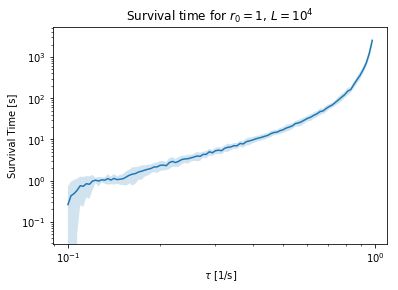

In [10]:
plt.plot(taus, mean_exit_times, label='Data')
plt.fill_between(taus, y_low, y_high, alpha=0.2, label='Error Area')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\tau$ [1/s]")
plt.ylabel("Survival Time [s]")
plt.title(r"Survival time for $r_0 = 1$, $L = 10^4$")